In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Steel_industry_data.csv")

In [3]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.iloc[:,8] = label_encoder.fit_transform(df.iloc[:,8])
df.iloc[:,9] = label_encoder.fit_transform(df.iloc[:,9])
df.iloc[:,10] = label_encoder.fit_transform(df.iloc[:,10])

In [5]:
### split dataset into independent and dependent features

y=df.iloc[:,10]
x=df.iloc[:,[1,3,5,7,8,9]]

In [6]:
x

Usage_kWh  Leading_Current_Reactive_Power_kVarh  \
0           3.17                                  0.00   
1           4.00                                  0.00   
2           3.24                                  0.00   
3           3.31                                  0.00   
4           3.82                                  0.00   
...          ...                                   ...   
35035       3.85                                  0.00   
35036       3.74                                  0.00   
35037       3.78                                  0.07   
35038       3.78                                  0.11   
35039       3.67                                  0.07   

       Lagging_Current_Power_Factor    NSM  WeekStatus  Day_of_week  
0                             73.21    900           0            1  
1                             66.77   1800           0            1  
2                             70.28   2700           0            1  
3                             68.09   3600           0            1  
4                             64.72   4500           0            1  
...                             ...    ...         ...          ...  
35035                         62.10  82800           0            1  
35036                         70.71  83700           0            1  
35037                         76.62  84600           0            1  
35038                         77.72  85500           0            1  
35039                         77.22      0           0            1  

[35040 rows x 6 columns]

In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
35035    0
35036    0
35037    0
35038    0
35039    0
Name: Load_Type, Length: 35040, dtype: int32

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [9]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9648148148148148

In [10]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.35185185185185186

In [11]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.975925925925926

In [12]:
from sklearn.model_selection import cross_val_score
#Set LogisticRegression, CV =3

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.89482471 0.95325543 0.90984975]
Avg : 0.9193099610461881


In [13]:
#Set SVM and CV=3

score_svm =cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)
print(score_svm)
print("Avg :",np.average(score_svm))

[0.38063439 0.41068447 0.51252087]
Avg : 0.4346132442960489


In [14]:
#Set Random Forest and CV=3

score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.93656093 0.96327212 0.92153589]
Avg : 0.9404563160823595


In [15]:
#Parameter Tuning Using K-Fold

In [16]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=5 and CV=10 :",np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 0.8653041589075109


In [17]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=20 and CV=10 :",np.average(scores2))

Avg Score for Estimators=20 and CV=10 : 0.9343296089385473


In [18]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=30 and CV=10 :",np.average(scores3))

Avg Score for Estimators=30 and CV=10 : 0.9482340161390439


In [19]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)

print("Avg Score for Estimators=40 and CV=10 :",np.average(scores4))

Avg Score for Estimators=40 and CV=10 : 0.9437926753569211


In [20]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

NameError: name 'KNeighborsClassifier' is not defined

In [21]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5) 

NameError: name 'sklearn' is not defined

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores.mean())

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8525684931506848


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.8393835616438355, 0.8453767123287672, 0.850142694063927, 0.8529965753424656, 0.8525684931506848, 0.8558504566210046, 0.8547659817351597, 0.8567066210045663, 0.8563356164383562, 0.8568207762557078, 0.856392694063927, 0.8561929223744291, 0.8551084474885844, 0.8568778538812785, 0.8554223744292238, 0.8551369863013699, 0.8541095890410959, 0.8553652968036529, 0.8548801369863014, 0.8552511415525116, 0.8555650684931507, 0.8556792237442922, 0.8555365296803652, 0.8564497716894977]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'Cross-Validated-Accuracy')

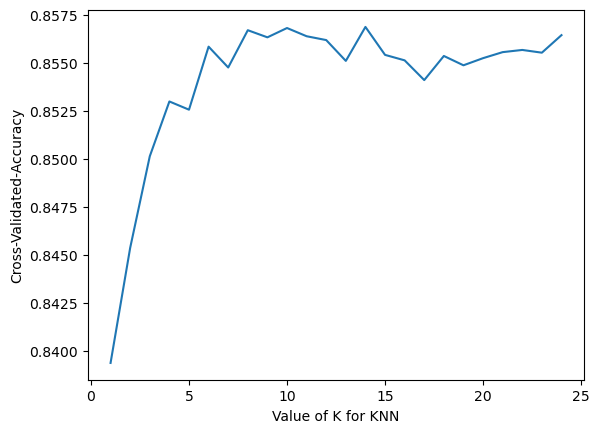

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated-Accuracy')